In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import pandas as pd
import glob


## Data Cleaning

In [3]:
start_date = "2020-01-12"
end_date = "2022-10-23"

d1_name ="Data/VIX_History*"
d2_name ="Data/2_Day_Smooth_Metaculus_Users_*"

d1_filename = glob.glob(d1_name)[0]
d2_filename = glob.glob(d2_name)[0]

d1= pd.read_csv(d1_filename)
d2= pd.read_csv(d2_filename)

d1.columns = d1.columns.str.upper()
d2.columns = d2.columns.str.upper()

d1['DATE'] = pd.to_datetime(d1["DATE"])
d1= d1.set_index("DATE")
d1_week = d1.resample("1W").sum()

d1.index=d1.index.strftime('%Y-%m-%d')


d2= d2.set_index("DATE")


vix = d1.loc[start_date:end_date]
vix_week = d1_week[start_date:end_date]
metaculus = d2.loc[start_date:end_date]

In [4]:
partial_name = f'Data/google_news*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
google_news = df_weekly.loc[start_date:end_date]

In [5]:
partial_name = f'Data/google_bonds*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
google_bonds = df_weekly.loc[start_date:end_date]

In [6]:
partial_name = f'Data/google_exchange*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
google_exchange = df_weekly.loc[start_date:end_date]


In [7]:
partial_name = f'Data/google_interest*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
google_interest = df_weekly.loc[start_date:end_date]


In [8]:
partial_name = f'Data/google_stock_market_news*'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
google_stock_market_news = df_weekly.loc[start_date:end_date]


In [9]:
partial_name = f'Data/google_stock_market.csv'
filename = glob.glob(partial_name)[0]
df_weekly= pd.read_csv(filename)

df_weekly['Week'] = pd.to_datetime(df_weekly["Week"])
df_weekly = df_weekly.set_index("Week")
df_weekly.columns=["Searches"]
df_weekly['Searches']= pd.to_numeric(df_weekly['Searches'])
google_stock_market = df_weekly.loc[start_date:end_date]


In [10]:
google_stock_market

,Searches
Week,
2020-01-12,12
2020-01-19,13
2020-01-26,15
2020-02-02,16
2020-02-09,13
...,...
2022-09-25,16
2022-10-02,15
2022-10-09,16


In [19]:
partial_name = f'Data/Idealized*'
filename = glob.glob(partial_name)[0]
d1= pd.read_csv(filename)

d1['DATE'] = pd.to_datetime(d1["DATE"])
d1= d1.set_index("DATE")
d1_week = d1.resample("1W").sum()
d1.index=d1.index.strftime('%Y-%m-%d')


stream = d1.loc[start_date:end_date]
stream_week = d1_week[start_date:end_date]


In [13]:
dates = vix.index
weeks =np.array( google_news.index, dtype = 'datetime64[D]')

In [20]:
vix_sig = vix["CLOSE"].to_numpy()
vix_weekly = vix_week["CLOSE"].to_numpy()
meta = metaculus.iloc[:, 0].to_numpy()
news = google_news.iloc[:, 0].to_numpy()
bonds = google_bonds.iloc[:, 0].to_numpy()
exchange = google_exchange.iloc[:, 0].to_numpy()
interest = google_interest.iloc[:, 0].to_numpy()
stock_market_news = google_stock_market_news.iloc[:, 0].to_numpy()
stock_market= google_stock_market.iloc[:, 0].to_numpy()
stream_sig = stream["CLOSE"].to_numpy()
stream_weekly = stream_week["CLOSE"].to_numpy()




## Change Point Analysis

In [23]:
def vix_PELT(vix_sig, sig2,dates, min_size = 30, pen = 3, jump = 5, model  ="l2"):
    
  
    algo = rpt.Pelt(model=model, min_size=min_size, jump=jump).fit(vix_sig)
    vix_pts = algo.predict(pen = pen) 

    algo = rpt.Pelt(model=model, min_size=min_size, jump=jump).fit(sig2)
    sig_pts = algo.predict(pen = pen)


    fig, ax_arr = rpt.display(vix_sig,vix_pts, sig_pts, figsize=(10, 6))
    
    labels = []
    for i in ax_arr[0].get_xticklabels():

        val = i.get_text()
        if val[0] != '−' and int(val) < len(dates):
            labels.append(dates[int(val)])
   
    ax_arr[0].set_xticklabels(labels)
    #print(labels)
    plt.title("PELT Change Point Analysis")
    plt.show()  
    print(vix_pts)
    print(sig_pts)
    return 

### VIX vs Metaculus

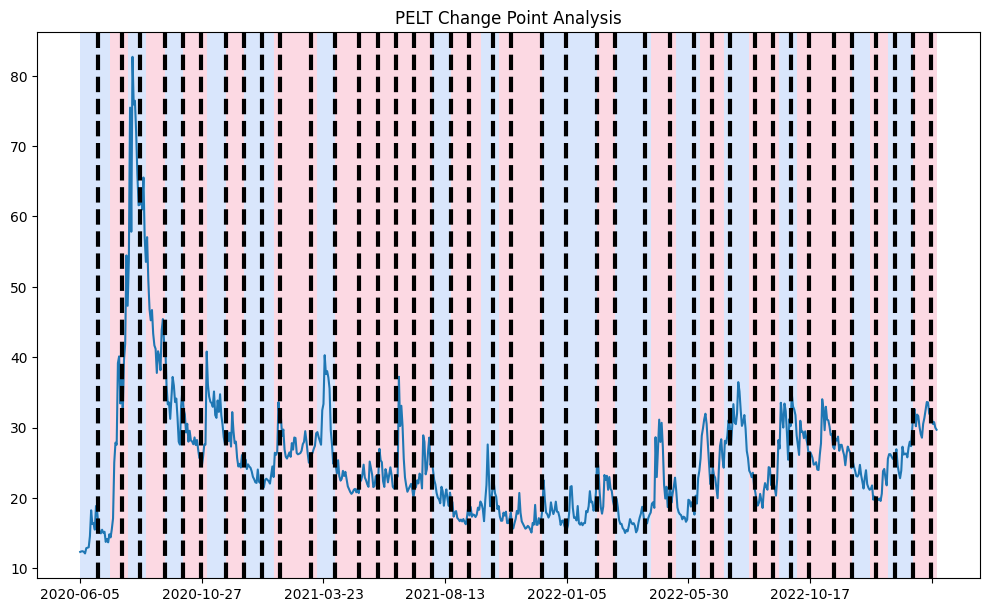

[25, 40, 55, 70, 85, 105, 120, 135, 160, 195, 210, 290, 305, 330, 345, 380, 425, 440, 470, 490, 510, 530, 550, 575, 590, 635, 650, 665, 685, 705]
[15, 35, 50, 70, 85, 100, 120, 135, 150, 165, 190, 210, 230, 245, 260, 275, 290, 305, 320, 340, 355, 380, 400, 425, 440, 465, 485, 505, 520, 535, 555, 570, 585, 600, 620, 635, 655, 670, 685, 700, 715, 740, 755, 770, 785, 800, 817]


In [13]:
vix_PELT(vix_sig, meta, dates, min_size = 15, pen = 6, model = "l1")

### VIX vs "News"

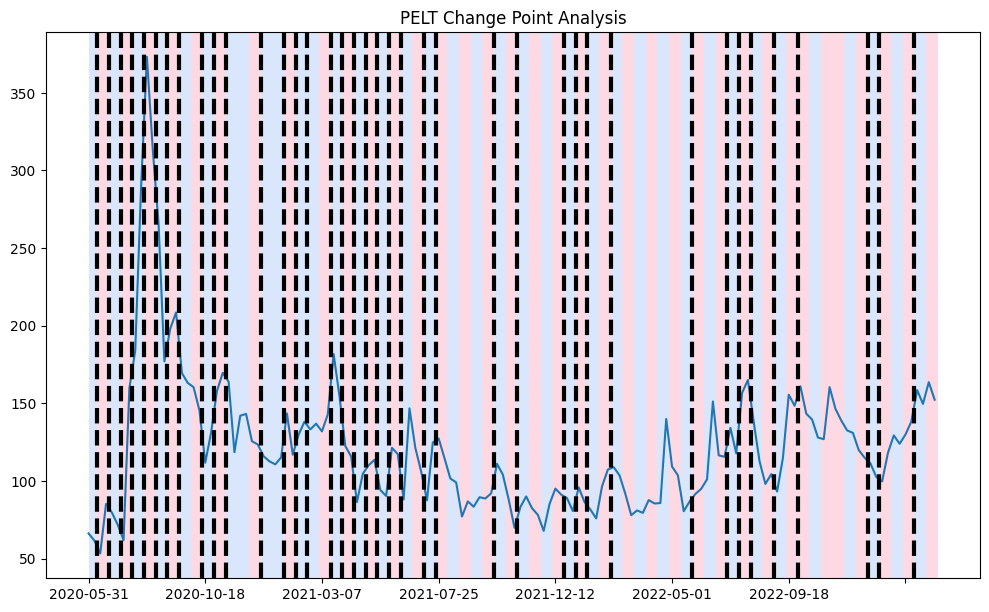

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 28, 30, 34, 36, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 124, 126, 130, 132, 134, 136, 138, 140, 142, 144, 146]
[2, 4, 6, 8, 10, 12, 14, 16, 20, 22, 24, 30, 34, 36, 38, 42, 44, 46, 48, 50, 52, 54, 58, 60, 70, 74, 82, 84, 86, 90, 104, 110, 112, 114, 118, 122, 134, 136, 142, 146]


In [14]:
vix_PELT(vix_weekly, news, weeks, min_size = 1, pen = 3, jump = 2, model = "l2")

### VIX vs "Bonds"

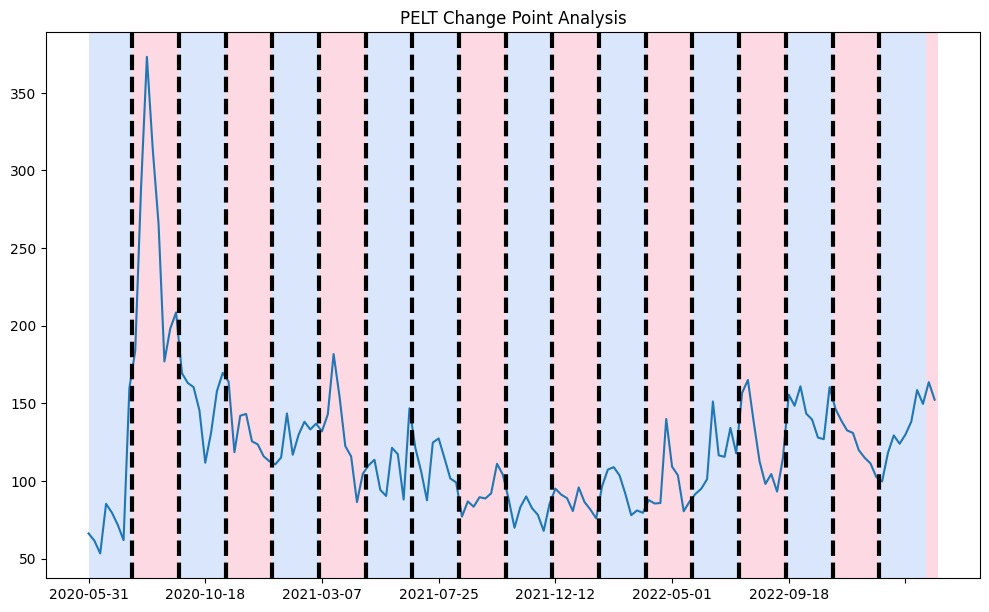

[8, 16, 24, 32, 40, 48, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 146]
[8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 146]


In [299]:
vix_PELT(vix_weekly, bonds, weeks, min_size = 1, pen = 3, jump  =1 , model = "l2")

### VIX vs "Exchange Rate"

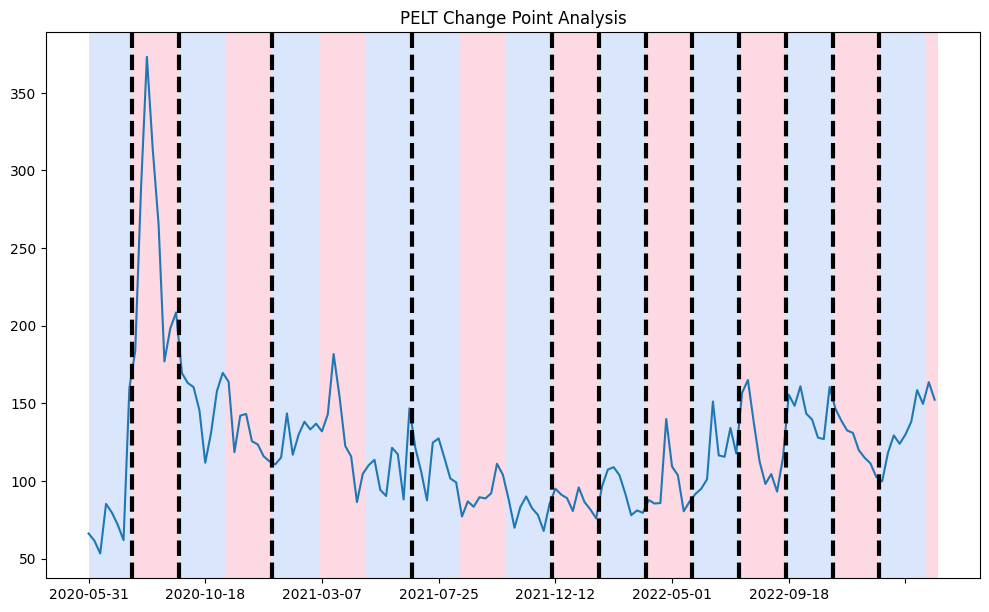

[8, 16, 24, 32, 40, 48, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 146]
[8, 16, 32, 56, 80, 88, 96, 104, 112, 120, 128, 136, 146]


In [300]:
vix_PELT(vix_weekly, exchange, weeks, min_size = 1, pen = 6, jump=8, model = "l2")

### VIX vs "Interest Rate"

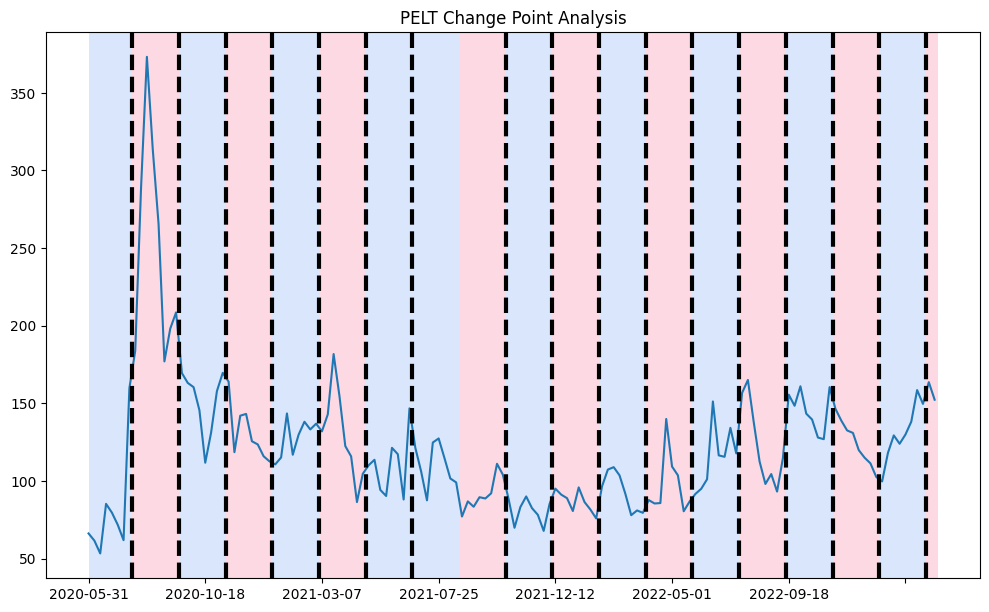

[8, 16, 24, 32, 40, 48, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 146]
[8, 16, 24, 32, 40, 48, 56, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 146]


In [301]:
vix_PELT(vix_weekly, interest, weeks, min_size = 1, pen = 6, jump =8, model = "l2")

### VIX vs "Stock Market" in News

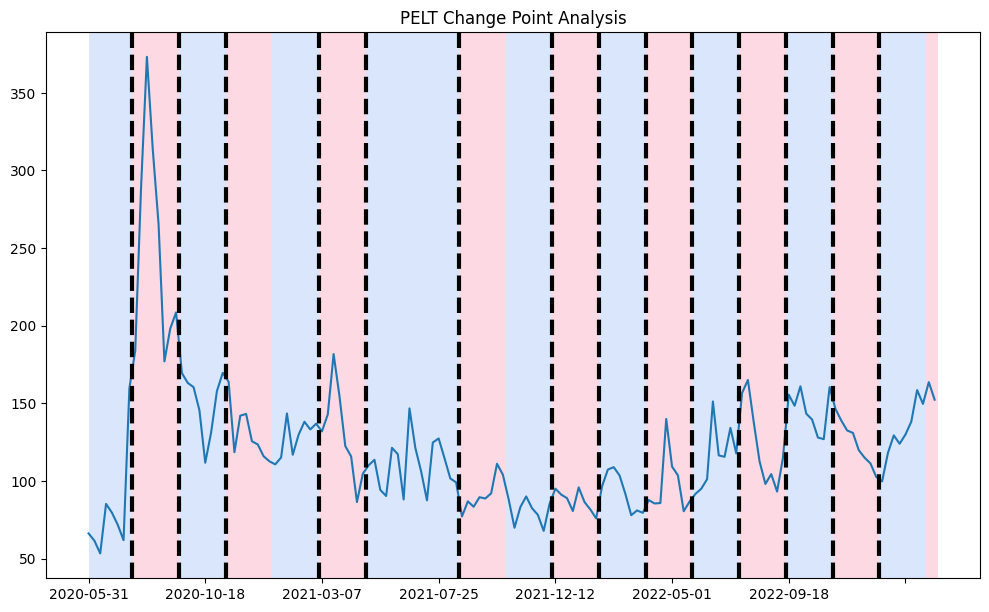

[8, 16, 24, 32, 40, 48, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 146]
[8, 16, 24, 40, 48, 64, 80, 88, 96, 104, 112, 120, 128, 136, 146]


In [302]:
vix_PELT(vix_weekly, stock_market_news, weeks, min_size = 1, pen = 6,jump = 8, model = "l2")

### VIX vs "Stock Market"

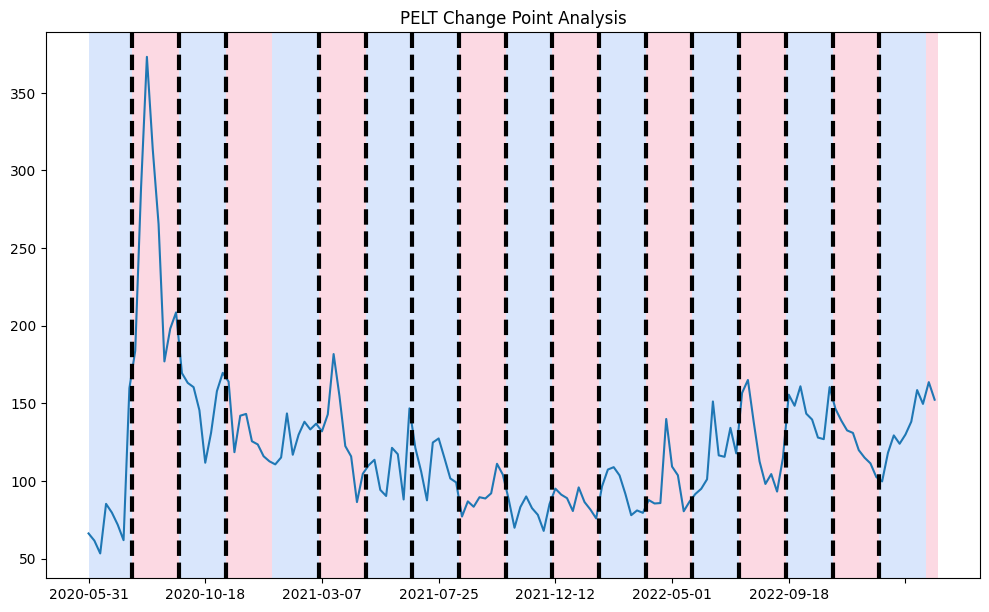

[8, 16, 24, 32, 40, 48, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 146]
[8, 16, 24, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 146]


In [25]:
vix_PELT(vix_weekly, stock_market, weeks, min_size = 1, pen = 6,jump = 8, model = "l2")

### VIX vs Stream

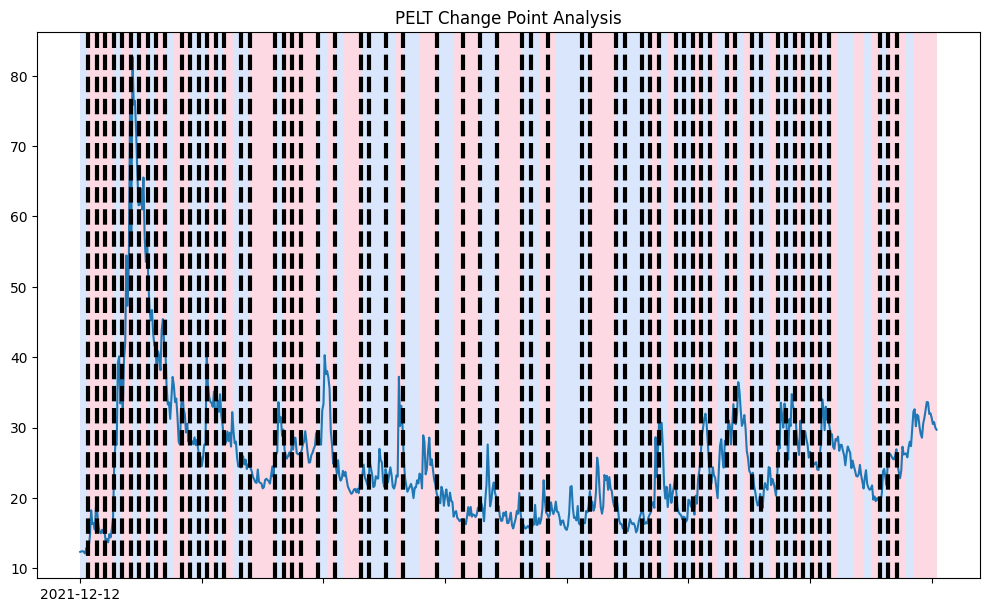

[7, 28, 35, 42, 49, 56, 63, 70, 77, 91, 105, 112, 119, 126, 140, 161, 168, 196, 203, 210, 217, 231, 259, 266, 280, 294, 308, 329, 343, 364, 378, 392, 420, 441, 469, 476, 483, 490, 504, 511, 518, 525, 532, 539, 546, 553, 567, 574, 588, 595, 602, 609, 616, 623, 637, 644, 651, 658, 665, 679, 686, 705]
[7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 84, 91, 98, 105, 112, 119, 133, 140, 161, 168, 175, 182, 196, 210, 231, 238, 252, 266, 294, 315, 329, 343, 364, 371, 385, 413, 420, 441, 448, 462, 469, 476, 490, 497, 504, 511, 518, 532, 539, 553, 560, 574, 581, 588, 595, 602, 609, 616, 658, 665, 672, 705]


In [26]:
vix_PELT(vix_sig, stream_sig, weeks, min_size = 7, pen = 6,jump = 7, model = "l2")

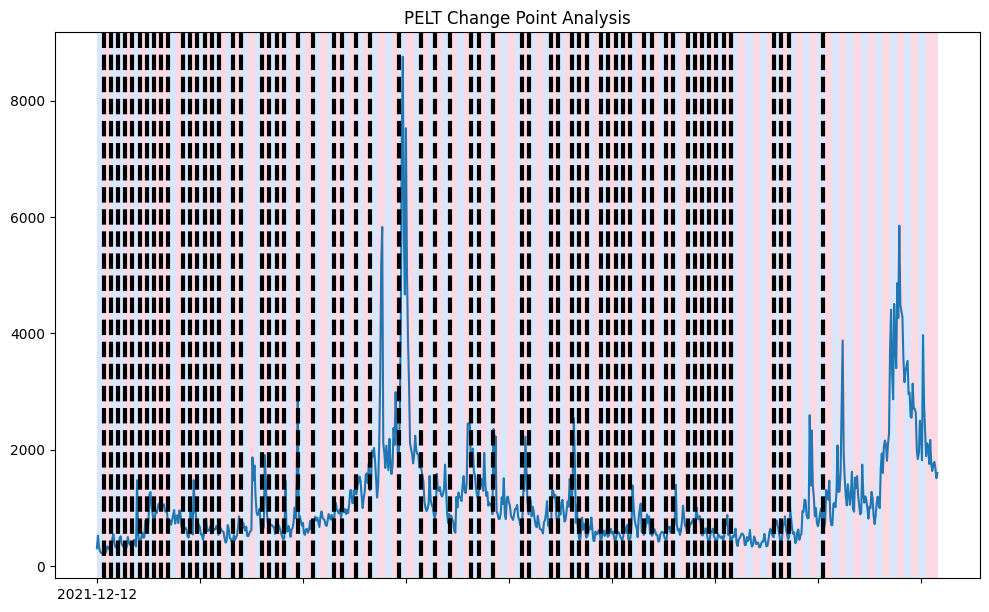

[7, 14, 28, 35, 42, 49, 56, 70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175, 182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266, 273, 280, 287, 294, 301, 308, 315, 322, 329, 336, 343, 350, 357, 364, 371, 378, 385, 392, 399, 406, 413, 420, 427, 434, 441, 448, 455, 462, 469, 476, 483, 490, 497, 504, 511, 518, 525, 532, 539, 546, 553, 560, 567, 574, 581, 588, 595, 602, 609, 616, 623, 630, 637, 644, 651, 658, 665, 672, 679, 686, 693, 700, 707, 714, 721, 728, 735, 742, 749, 756, 763, 770, 777, 784, 791, 798, 805, 817]
[7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 84, 91, 98, 105, 112, 119, 133, 140, 161, 168, 175, 182, 196, 210, 231, 238, 252, 266, 294, 315, 329, 343, 364, 371, 385, 413, 420, 441, 448, 462, 469, 476, 490, 497, 504, 511, 518, 532, 539, 553, 560, 574, 581, 588, 595, 602, 609, 616, 658, 665, 672, 705]


In [27]:
vix_PELT(meta, stream_sig, weeks, min_size = 7, pen = 6,jump = 7, model = "l2")